# Laboratory Work: Chickenpox Propagation Prediction/Forecasting

- The objective of this Laboratry Work is to put in application time series data forecasting using a **Deep Neural Network**. For that it is nececssary to learn the model behind the time series data giving the relation between output, input, and their past and future values as given in the relation below:
$$y(k+p)=F(y(k),y(k-1),\ldots,y(k-d_y), u(k),u(k-1),u(k-2),\ldots,u(k-d_u))$$
where:
    - $y(k)$: is the output predicted signal
    - $u(k)$: is the input signal
    - $p$: is the prediction horizont
    - $d_y$: is the output memory/delay order 
    - $d_u$: is the input memory/delay order
- In our application  $p>0$, $d_u=0$ and $d_y>0$
- We will resolve this prediction problem by transforming the related recurrent Neural Network to a feedforword Neural Network and using the learning algorithms and tools provided by Keras toolbox. So if we consider that we have a learning base given by $u(k), y(k), k=1,2,\ldots, n $ we have to create one input signal from input learning base $u(k)$ and $d_y+1$ input signal coming from shifted in the past $y(k)$ signal. We can begin the prediction learning with $p=1$ and $d_y=9$ as given in the construction of learning base in section *Data Base*.
- **Work to be done**:
    - For different perdiction horizont $p\in{1,2,3}$ and memory/predictor order $d_y\in{7,8,9,10}$ propose a Neural Network  architecture, operate the learning phase, give the results of testing phase and make some conclusions wrt accuracy.
    - **Optional**: Propose an implementation of Back Propogation algorithm to operate the learning phase.
    - **Optional**: Propose other Neuronal Network architecture like SimpleRNN, GRU or LSTM (https://towardsdatascience.com/time-series-forecasting-with-rnns-ff22683bbbb0) to implement and operate the learning and compare your results with the feedforward architecture given above.
    - Genral conclusion
- **A report** on the Laboratory Work has to be written in **Jupyter** or in any other editor.
- **The report** as well as **Jupyter code** has to be sent **before 25 of december 2019** by e-mail to a.cela@esiee.fr specifying in the **object: Lab_DL_CELA_2019** and sending a  copy of the e-mail eventually to the other person involved (**which has to be at maximun two**). The name of the persons involved has to be given in the document also.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from keras import models
from keras import layers
from keras import optimizers
import pandas as pd

Using TensorFlow backend.


# Data Base
- The example trains an **Deep neural Network** to forecast the number of chickenpox cases, taken from the data set **chickenpox_dataset**, given the number of cases in previous months
- Load the example data from **data_chickenpox.txt** text file which contains a single time series, with time steps corresponding to months and values corresponding to the number of cases 
- Construct the input **Deep Neural Network** input w.r.t memory/predictor order (**$nn_0$**) ( 10 in our case)
- Split the data in **Training Set**, **Validation Set** and **Test Set**

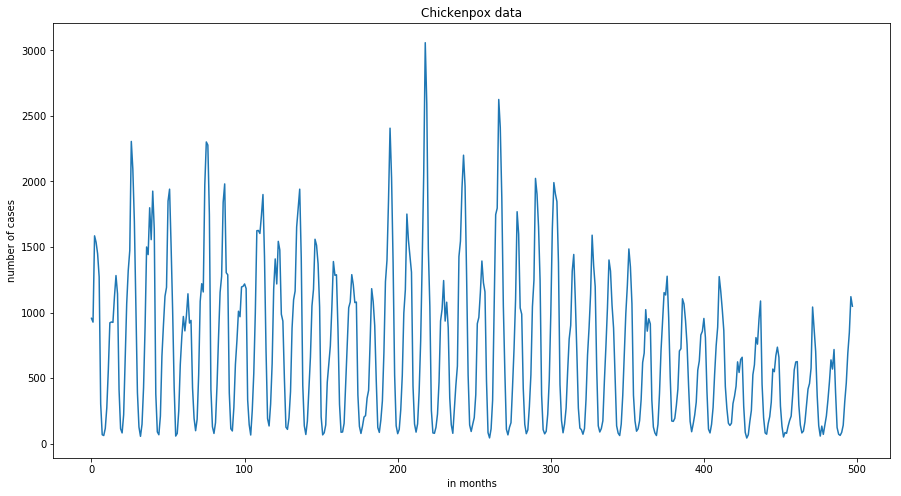

(498,)
(489, 10)
(489, 1)


In [2]:
S= np.loadtxt('data_chickenpox.txt')
n=len(S)
plt.figure(figsize=(15,8))
plt.plot(S)
plt.title('Chickenpox data')
plt.xlabel('in months')
plt.ylabel('number of cases')
plt.show()
nn_0=10                                                                       # Prediction order or number of neurons in the input layer
nn_1=10                                                                       # Number of neurons in the hidden layer
nn_2=1                                                                        # Number of neurons in the output layer     
y=S
print(S.shape)
# Input Signal Contruction

V=y[nn_0-1:len(y),]
for i in range(nn_0-1):
    V=np.c_[V,y[nn_0-2-i:len(y)-(i+1),]]    
T=np.mat(y[nn_0-1:,]).T                                                         # Target Signal Contruction 
print(V.shape)
print(T.shape)
input_NN=V[:400,:]
target_NN=T[:400,]
input_Test=V[400:,:]
target_Test=T[400:,]
input_Val=input_Test
target_Val=target_Test

In [3]:
def create_perdiction_order(y,order):
    V=y[order-1:len(y),]
    for i in range(order-1):
        V=np.c_[V,y[order-2-i:len(y)-(i+1),]]    
    T=np.mat(y[order-1:,]).T 
    return T,V

# Standardize Data
For a better fit and to prevent the training from diverging, standardize the training data to have zero mean and unit variance. Standardize the test data using the same parameters as the training data.

(89, 10)
(89, 1)


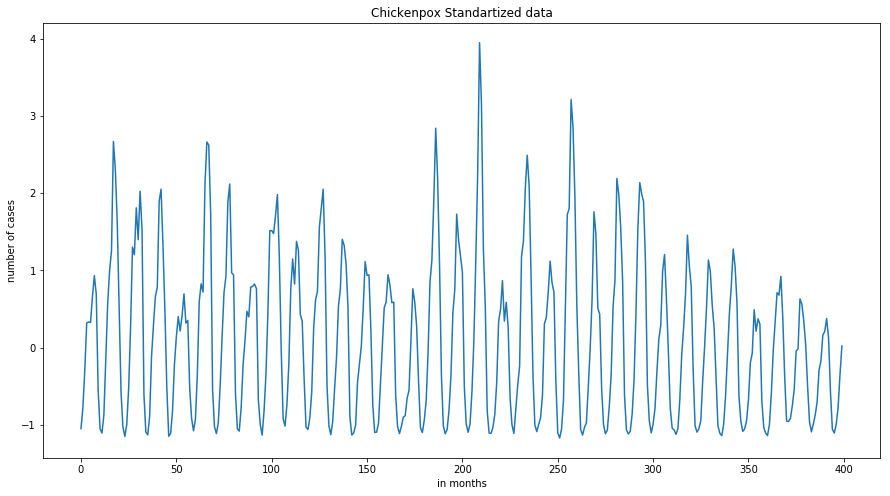

In [4]:
Standartize=True#False
if (Standartize): #(Standartize=='0K')
    mu = np.mean(S);                                                                   # mean of S calculation
    sig = np.std(S);                                                                   # variance of S calculation
    input_NN = (input_NN - mu) / sig
    target_NN =(target_NN - mu) / sig
    plt.figure(figsize=(15,8))
    plt.plot(target_NN)
    plt.title('Chickenpox Standartized data')
    plt.xlabel('in months')
    plt.ylabel('number of cases')
    input_Test = (input_Test - mu) / sig
    target_Test= (target_Test -mu) / sig
    target_Val=target_Test
    print(input_Test.shape)
    print(target_Test.shape)

In [5]:
def standardize_data(input_NN,target_NN,input_Test,target_Val,target_Test):
    mu = np.mean(S);                                                                   # mean of S calculation
    sig = np.std(S);                                                                   # variance of S calculation
    input_NN = (input_NN - mu) / sig
    target_NN =(target_NN - mu) / sig
    input_Test = (input_Test - mu) / sig
    target_Test= (target_Test -mu) / sig
    target_Val=target_Test
    return input_Test,target_Test,target_Val

# Deep Neural Network Architecture
- Define the type of DNN: In our case we have chosen the **Sequential** DNN
- Define the type of activation function for each layer (**linear,relu,linear** in our case)
- Define the learning/optimization method used (**RMSprop** in our case)
- Define the criteria to minimize and the related metric (**MSE** and **'accuracy'** in our case)
- Define the **batch size** and the number of **epochs** (**batch_size=4, epochs=50** in our case)
- $nn_0$ gives the prediction order or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

In [6]:
model = models.Sequential() 
model.add(layers.Dense(nn_0, input_shape=(input_Val.shape[1],), activation="linear"))
model.add(layers.Dense(nn_1, activation="relu"))
model.add(layers.Dense(nn_2, activation="linear"))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='mse',
              metrics=['accuracy'])
history=model.fit(x=input_NN, y=target_NN, batch_size=4, epochs=50,verbose=1,validation_data=(input_Val, target_Val))

Train on 400 samples, validate on 89 samples
Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.2885 - acc: 0.0000e+00 - val_loss: 350506.2270 - val_acc: 0.0000e+00
Epoch 2/50
400/400 [==============================] - 0s 923us/step - loss: 0.0684 - acc: 0.0000e+00 - val_loss: 374060.3564 - val_acc: 0.0000e+00
Epoch 3/50
400/400 [==============================] - 0s 963us/step - loss: 0.0410 - acc: 0.0000e+00 - val_loss: 362896.0346 - val_acc: 0.0000e+00
Epoch 4/50
400/400 [==============================] - 0s 963us/step - loss: 0.0303 - acc: 0.0000e+00 - val_loss: 357987.7848 - val_acc: 0.0000e+00
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0233 - acc: 0.0000e+00 - val_loss: 383626.4336 - val_acc: 0.0000e+00
Epoch 6/50
400/400 [==============================] - 0s 951us/step - loss: 0.0188 - acc: 0.0000e+00 - val_loss: 310006.1347 - val_acc: 0.0000e+00
Epoch 7/50
400/400 [==============================] - 0s 891us/step - loss: 0

- as result in figure our prediction data with target data are close but with some fluctuation.

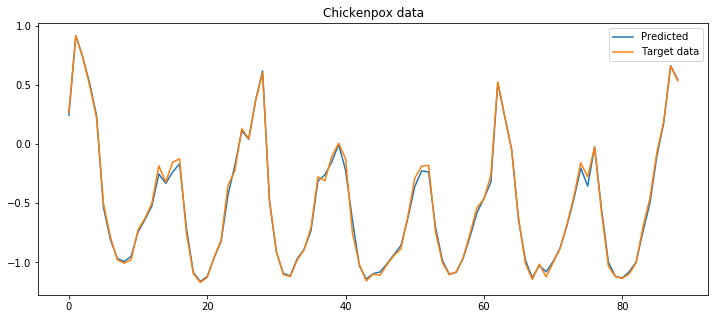

In [7]:
plt.figure(3, figsize=(12,5))
plt.plot(model.predict(input_Test))
plt.plot(target_Test)
plt.title('Chickenpox data')
plt.legend(('Predicted','Target data'),loc='upper right')
plt.show()

In [8]:
X_train_series = input_NN.reshape((input_NN.shape[0], input_NN.shape[1], 1))
X_valid_series = input_Val.reshape((input_Val.shape[0], input_Val.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (400, 10, 1)
Validation set shape (89, 10, 1)


In [9]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(50, activation='relu'))
model_cnn.add(layers.Dense(1))
model_cnn.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.001), 
                  metrics=['accuracy'])
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9, 64)             192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 13,093
Trainable params: 13,093
Non-trainable params: 0
_________________________________________________________________


In [10]:
def create_model(order,horizon):                        # Prediction order or number of neurons in the input layer
    nn_1=10                                               # Number of neurons in the hidden layer
    nn_2=1                                                # Number of neurons in the output layer  
    T,V = create_perdiction_order(y,order)
    input_NN=V[:400,:]
    target_NN=T[:400,]
    input_Test=V[400:,:]
    target_Test=T[400:,]
    input_Val=input_Test
    target_Val=target_Test
    input_Test,target_Test,target_Val=standardize_data(input_NN,target_NN,input_Test,target_Val,target_Test)
    model = models.Sequential() 
    model.add(layers.Dense(order, input_shape=(input_NN.shape[1],), activation="linear"))
    model.add(layers.Dense(nn_1, activation="relu"))
    model.add(layers.Dense(nn_2, activation="linear"))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
                  loss='mse',
                  metrics=['accuracy'])
   
    history=model.fit(x=input_NN, y=target_NN, batch_size=4, epochs=50,verbose=1,validation_data=(input_Val, target_Val))
    return history,model,target_Val,input_Test
history,model,target_Val,input_Test = create_model(9,1)  

Train on 400 samples, validate on 90 samples
Epoch 1/50
400/400 [==============================] - 1s 3ms/step - loss: 392941.6820 - acc: 0.0000e+00 - val_loss: 240999.0741 - val_acc: 0.0000e+00
Epoch 2/50
400/400 [==============================] - 0s 981us/step - loss: 23344.7677 - acc: 0.0025 - val_loss: 284880.3990 - val_acc: 0.0000e+00
Epoch 3/50
400/400 [==============================] - 0s 941us/step - loss: 8067.5556 - acc: 0.0075 - val_loss: 277866.5924 - val_acc: 0.0000e+00
Epoch 4/50
400/400 [==============================] - 0s 933us/step - loss: 5450.3890 - acc: 0.0100 - val_loss: 275386.9613 - val_acc: 0.0000e+00
Epoch 5/50
400/400 [==============================] - 0s 901us/step - loss: 3764.9910 - acc: 0.0125 - val_loss: 287278.8532 - val_acc: 0.0000e+00
Epoch 6/50
400/400 [==============================] - 0s 1ms/step - loss: 3329.4896 - acc: 0.0050 - val_loss: 302513.4626 - val_acc: 0.0000e+00
Epoch 7/50
400/400 [==============================] - 0s 948us/step - loss: 

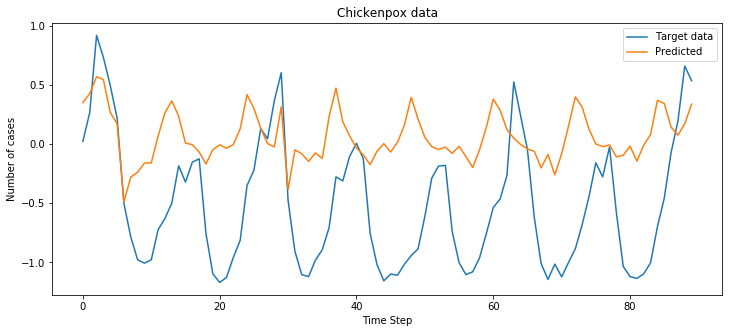

In [11]:
predict=model.predict(input_Test)
plt.figure(3, figsize=(12,5))
plt.plot(target_Val)
plt.plot(predict)    
plt.ylabel('Number of cases')
plt.xlabel('Time Step')
plt.legend(('Target data','Predicted'),loc='upper right')
plt.title('Chickenpox data')
plt.show();

In [12]:
history,model,target_Val,input_Test = create_model(8,2)  

Train on 400 samples, validate on 91 samples
Epoch 1/50
400/400 [==============================] - 1s 3ms/step - loss: 248597.0754 - acc: 0.0000e+00 - val_loss: 204358.3032 - val_acc: 0.0000e+00
Epoch 2/50
400/400 [==============================] - 0s 961us/step - loss: 39436.8284 - acc: 0.0050 - val_loss: 272671.6695 - val_acc: 0.0000e+00
Epoch 3/50
400/400 [==============================] - 0s 936us/step - loss: 16041.7307 - acc: 0.0075 - val_loss: 285900.8858 - val_acc: 0.0000e+00
Epoch 4/50
400/400 [==============================] - 0s 903us/step - loss: 10086.7714 - acc: 0.0000e+00 - val_loss: 276656.1629 - val_acc: 0.0000e+00
Epoch 5/50
400/400 [==============================] - 0s 901us/step - loss: 7676.4237 - acc: 0.0050 - val_loss: 289555.8606 - val_acc: 0.0000e+00
Epoch 6/50
400/400 [==============================] - 0s 906us/step - loss: 6477.5971 - acc: 0.0075 - val_loss: 293149.4028 - val_acc: 0.0000e+00
Epoch 7/50
400/400 [==============================] - 0s 871us/step 

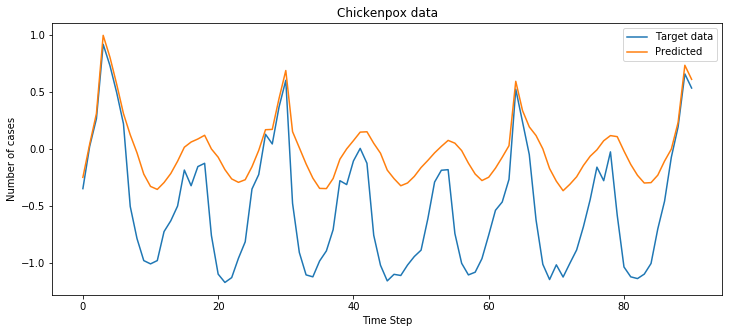

In [13]:
predict=model.predict(input_Test)
plt.figure(3, figsize=(12,5))
plt.plot(target_Val)
plt.plot(predict)    
plt.ylabel('Number of cases')
plt.xlabel('Time Step')
plt.legend(('Target data','Predicted'),loc='upper right')
plt.title('Chickenpox data')
plt.show();

In [14]:
history,model,target_Val,input_Test = create_model(7,3)  

Train on 400 samples, validate on 92 samples
Epoch 1/50
400/400 [==============================] - 1s 3ms/step - loss: 830383.0309 - acc: 0.0000e+00 - val_loss: 118348.4378 - val_acc: 0.0000e+00
Epoch 2/50
400/400 [==============================] - 0s 933us/step - loss: 108555.9816 - acc: 0.0000e+00 - val_loss: 257003.9081 - val_acc: 0.0000e+00
Epoch 3/50
400/400 [==============================] - 0s 906us/step - loss: 33785.9910 - acc: 0.0025 - val_loss: 302029.4655 - val_acc: 0.0000e+00
Epoch 4/50
400/400 [==============================] - 0s 906us/step - loss: 21509.7718 - acc: 0.0050 - val_loss: 293552.9412 - val_acc: 0.0000e+00
Epoch 5/50
400/400 [==============================] - 0s 901us/step - loss: 14998.8842 - acc: 0.0000e+00 - val_loss: 282907.0785 - val_acc: 0.0000e+00
Epoch 6/50
400/400 [==============================] - 0s 896us/step - loss: 11383.1261 - acc: 0.0050 - val_loss: 291991.8657 - val_acc: 0.0000e+00
Epoch 7/50
400/400 [==============================] - 0s 928u

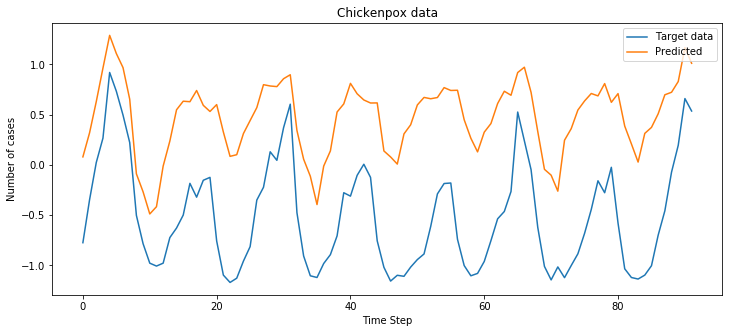

In [15]:
predict=model.predict(input_Test)
plt.figure(3, figsize=(12,5))
plt.plot(target_Val)
plt.plot(predict)    
plt.ylabel('Number of cases')
plt.xlabel('Time Step')
plt.legend(('Target data','Predicted'),loc='upper right')
plt.title('Chickenpox data')
plt.show();

# Time Series Prediction with LSTMs

The object of using LSTMs is build the forecast time series data

To forecast the values of future time steps of a sequence, we should train a sequence-to-sequence regression LSTM network, where the responses are the training sequences with values shifted by one time step.

That is, at each time step of the input sequence, the LSTM network learns to predict the value of the next time step.

**it need reshape input from [samples, timesteps] into [samples, timesteps, features].**

In [16]:
# to split data in and reshape for LSTM we need data, prediction, future 
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(input_NN, time_steps)
X_test, y_test = create_dataset(input_Test, time_steps)
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_test.shape)
print(X_train.shape)

(81, 1, 10)
(389, 1, 10)


In [18]:
'''model = models.Sequential()
model.add(layers.LSTM(nn_0, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(nn_1, activation="relu"))
model.add(layers.Dense(nn_2, activation="linear"))
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(0.001))'''

'model = models.Sequential()\nmodel.add(layers.LSTM(nn_0, input_shape=(X_train.shape[1], X_train.shape[2])))\nmodel.add(layers.Dense(nn_1, activation="relu"))\nmodel.add(layers.Dense(nn_2, activation="linear"))\nmodel.compile(loss=\'mean_squared_error\', optimizer=optimizers.Adam(0.001))'

In [19]:
model = models.Sequential() 
model.add(layers.LSTM(nn_0, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(nn_1, activation="relu"))
model.add(layers.Dense(nn_2, activation="linear"))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='mse',
              metrics=['accuracy'])

In [20]:
history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=50,verbose=1,shuffle=False,validation_data=(X_train, y_train))

Train on 389 samples, validate on 389 samples
Epoch 1/50
389/389 [==============================] - 4s 10ms/step - loss: 1.0742 - acc: 0.0000e+00 - val_loss: 0.8866 - val_acc: 0.0000e+00
Epoch 2/50
389/389 [==============================] - 1s 2ms/step - loss: 0.7255 - acc: 0.0000e+00 - val_loss: 0.6040 - val_acc: 0.0000e+00
Epoch 3/50
389/389 [==============================] - 1s 2ms/step - loss: 0.5139 - acc: 0.0000e+00 - val_loss: 0.4524 - val_acc: 0.0000e+00
Epoch 4/50
389/389 [==============================] - 1s 2ms/step - loss: 0.3726 - acc: 0.0000e+00 - val_loss: 0.3264 - val_acc: 0.0000e+00
Epoch 5/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2708 - acc: 0.0000e+00 - val_loss: 0.2445 - val_acc: 0.0000e+00
Epoch 6/50
389/389 [==============================] - 1s 2ms/step - loss: 0.2086 - acc: 0.0000e+00 - val_loss: 0.1959 - val_acc: 0.0000e+00
Epoch 7/50
389/389 [==============================] - 1s 2ms/step - loss: 0.1733 - acc: 0.0000e+00 - val_loss: 0.

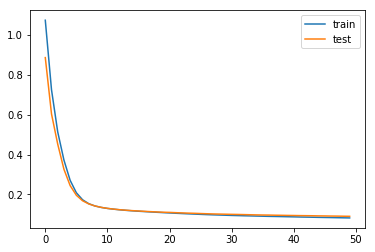

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

- After about 13 epochs, the model is pretty much-done learning.

Do the prediction on test data

In [22]:
predict = model.predict(X_test)

Plot the predictions over the forcatse values from the Time Series

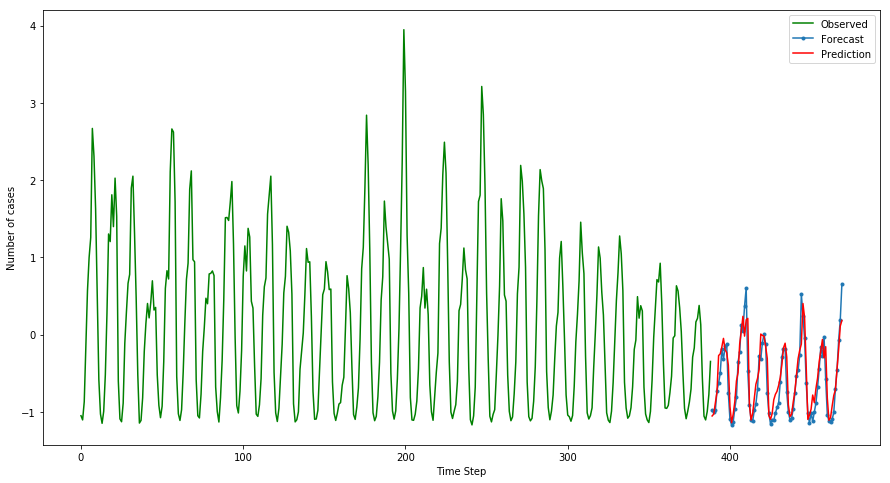

In [23]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="Observed")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Forecast")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), predict, 'r', label="Prediction")
plt.ylabel('Number of cases')
plt.xlabel('Time Step')
plt.legend()
plt.show();

As observed, 
- the prediction data are almost close to forcasting data
- there are some fluctuations, it seems the model is good.

Below plot displays a comparison between forcast and prediction data

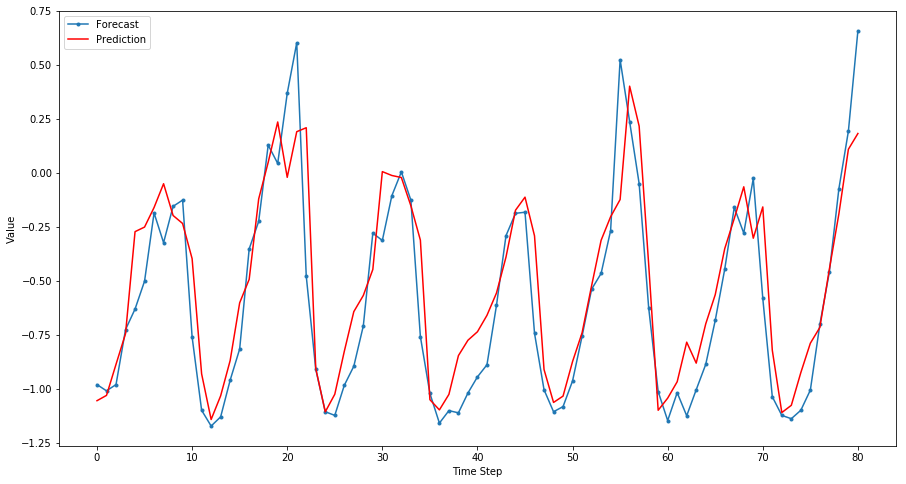

In [24]:
plt.figure(figsize=(15,8))
plt.plot(y_test, marker='.', label="Forecast")
plt.plot(predict, 'r', label="Prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [25]:
"""def create_lstm_model(nn_0,horizon):
    X_train, y_train = create_dataset(input_NN, horizon)
    X_test, y_test = create_dataset(input_Test, horizon)
    # reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    print(X_test.shape)
    print(X_train.shape)
    model = models.Sequential() 
    model.add(layers.LSTM(nn_0, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.Dense(nn_1, activation="relu"))
    model.add(layers.Dense(horizon))#, activation="linear"))
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='mse',
              metrics=['accuracy'])
    history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=50,verbose=1,shuffle=False,validation_data=(X_train, y_train))
    predict = model.predict(X_test)
    plt.figure(figsize=(15,8))
    plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="Observed")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Forecast")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), predict, 'r', label="Prediction")
    plt.ylabel('Number of cases')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();"""

'def create_lstm_model(nn_0,horizon):\n    X_train, y_train = create_dataset(input_NN, horizon)\n    X_test, y_test = create_dataset(input_Test, horizon)\n    # reshape input to be [samples, time steps, features]\n    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))\n    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))\n    print(X_test.shape)\n    print(X_train.shape)\n    model = models.Sequential() \n    model.add(layers.LSTM(nn_0, input_shape=(X_train.shape[1], X_train.shape[2])))\n    model.add(layers.Dense(nn_1, activation="relu"))\n    model.add(layers.Dense(horizon))#, activation="linear"))\n    model.compile(optimizer=optimizers.RMSprop(lr=0.001), \n              loss=\'mse\',\n              metrics=[\'accuracy\'])\n    history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=50,verbose=1,shuffle=False,validation_data=(X_train, y_train))\n    predict = model.predict(X_test)\n    plt.figure(figsize=(15,8))\n    plt.plot(np.arange(0,

# Conclusion

The target of first part is first Prediction/forecasting data by Neural network, and in second part forecast by LSTMs.

- I understand I have to change the predictor order nn_0 as 7,8,9,10 and 
  horizon as 1,2,3 for example in next month, next 2 months and in next 3 months by shifting the data and learn model by    this data in order to forecaste, then 4 model for predictor and 3 model for horizon.
  
- it needs to split data according to horizon then forecast by prediction and history of data. it calls feed forward neuarl network. There is no feedback (loops); the output of any layer does not affect that same layer means there is no feed back connection that output of the network fed back into itself.

- Unlike the feed-forward neural networks, the recurrent neural networks use their internal state memory for processing sequences. recurrent networks are dynamic; their state is changing continuously until they reach a balance point. They remain at the balance point until the input changes and a new balance needs to be found.

- The long short-term memory (LSTM) network trained by gradient descent solves difficult problems which traditional recurrent neural networks in general cannot. By LSTM which is a kind of Recurrent neural network, it ables to predict the next step by before. by LSTM we could build a multivariate and multi-step time series forecasting with LSTMs.it sees the input data as a sequence, it's able to learn patterns from sequenced data.

- **The benefit of LSTM is that it can support very long input sequences that can be read as blocks or subsequences by the Neural Network model**